# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ni Komang Vaniya Apriandani
- **Email:** vaniyaapriann@gmail.com
- **ID Dicoding:** vaniyaaprian

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah penyewa sepeda per jam tiap harinya?
- Bagaimana jumlah penyewa casual dan registered setiap harinya?
- Bagaimana jumlah penyewa pada weekdays dan weekend?



## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install numpy pandas scipy matplotlib seaborn

In [ ]:
# import all library and packages that use in my project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Data Wrangling

### Gathering Data

In [ ]:
# Load the dataset
hour_data = pd.read_csv('hour.csv')

# Display the first few rows of the dataset
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data hour_csv sudah berhasil dibaca menggunakan fungsi read_csv()
- Data yang ditampilkan sudah sesuai dengan data pada dataset

### Assessing Data

In [ ]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi pada dataset: ", hour_data.duplicated().sum())

Jumlah duplikasi pada dataset:  0


In [ ]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada tahap penilaian ini akan dilakukan penilaian terhadap kualitas dan struktur data dengan tujuan mengidentifikasi apakah terdapat *missing values*, *invalid value*, *duplicate value* dan *inaccurate value* dengan menggunakan metode yang disediakan oleh library pandas.
- Setelah proses dilakukan, ternyata terdapat ketidaksesuaian type data pada kolom "dtdey" dengan type data object. Yang mana sebaiknya menggunakan type data datetime.


### Cleaning Data

In [ ]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tahap *cleaning* data penting dilakukan untuk membersihan data sebelum masuk ke tahap analisis data.
- Pada tahap ini, dilakukan perubahan data dengan mengubah tipe data untuk "dteday" dari tipe data object menjadi tipe data datetime.
- Dengan  menggunakan kode hour_data.info() akan menampilkan informasi mengenai detail dari dataFrame. Kode inilah yang menunjukan tipe data pada dataFrame.


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Descriptive statistics
hour_data.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hour_data['date'] = hour_data['dteday'].dt.date
hour_data['year'] = hour_data['dteday'].dt.year

# Group by year, hour to get total rentals per hour
rentals_per_hour_by_year = hour_data.groupby(['year', 'hr'])['cnt'].sum().reset_index()

# Display the first few rows
rentals_per_hour_by_year.head()

,year,hr,cnt
0,2011,0,15540
1,2011,1,9558
2,2011,2,6661
3,2011,3,3441
4,2011,4,1817


In [ ]:
# Grouping data by date to get total casual and registered rentals per day
daily_rentals = hour_data.groupby('date')[['casual', 'registered']].sum().reset_index()

# Display the first few rows
daily_rentals.head()


,date,casual,registered
0,2011-01-01,331,654
1,2011-01-02,131,670
2,2011-01-03,120,1229
3,2011-01-04,108,1454
4,2011-01-05,82,1518


In [ ]:
# Create a new column to categorize days as 'Weekday' or 'Weekend'
hour_data['day_type'] = np.where(hour_data['weekday'] < 5, 'Weekday', 'Weekend')

# Grouping data by day type to get total rentals
rentals_by_day_type = hour_data.groupby('day_type')['cnt'].sum().reset_index()

# Display the total rentals by day type
rentals_by_day_type


,day_type,cnt
0,Weekday,2327082
1,Weekend,965597


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

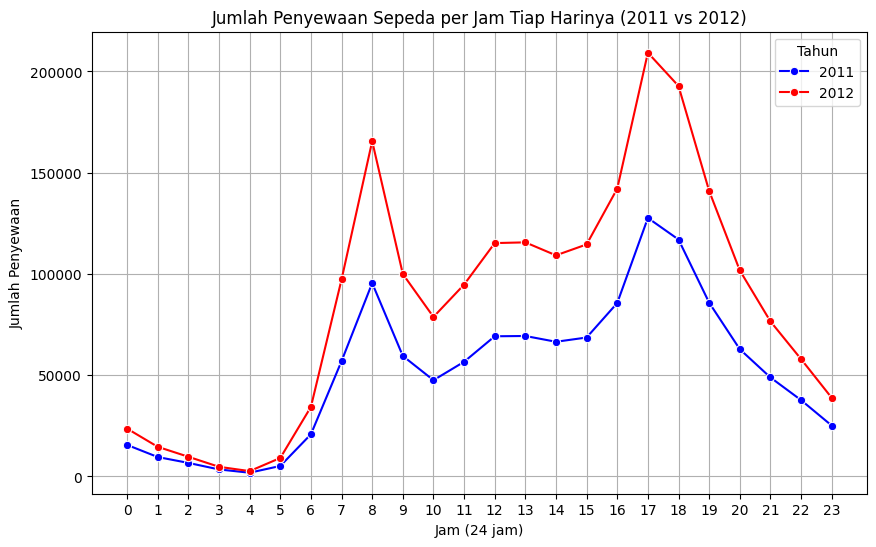

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette= {2011: "blue", 2012: "red"}
sns.lineplot(data=rentals_per_hour_by_year, x='hr', y='cnt', hue='year', palette=custom_palette, marker='o', style='year', dashes=False)
plt.title('Jumlah Penyewaan Sepeda per Jam Tiap Harinya (2011 vs 2012)')
plt.xlabel('Jam (24 jam)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(24))  # Show hours from 0 to 23
plt.legend(title='Tahun',loc='upper right', bbox_to_anchor=(1,1))
plt.grid()
plt.show()


### Pertanyaan 2:

<Figure size 1000x600 with 0 Axes>

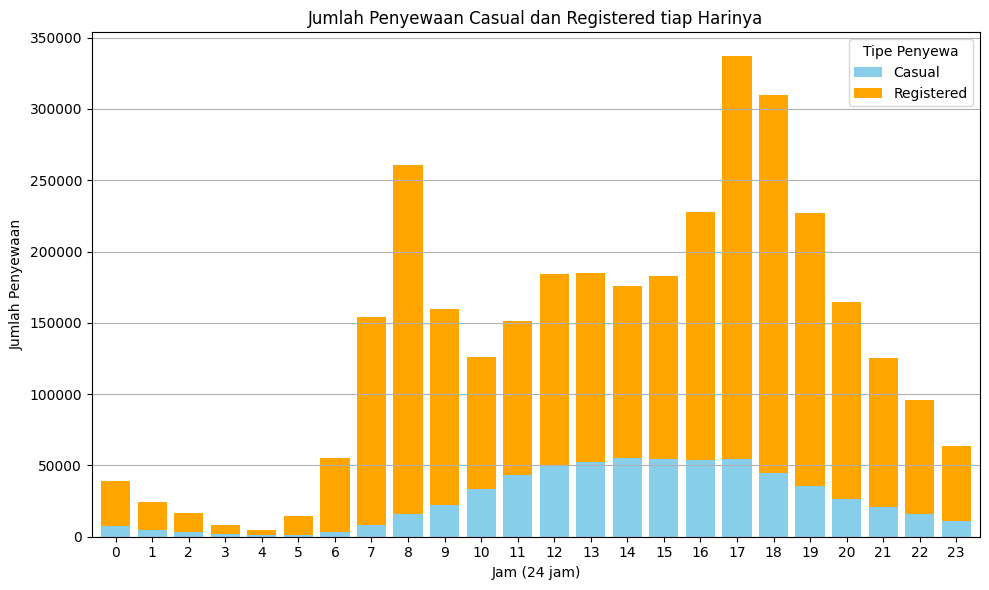

In [ ]:
# Sum the casual and registered rentals per hour
rentals_per_hour = hour_data.groupby('hr')[['casual', 'registered']].sum().reset_index()

# Plot stacked bar plot
plt.figure(figsize=(10, 6))
rentals_per_hour.plot(
    x='hr',
    kind='bar',
    stacked=True,
    color=['skyblue', 'orange'],
    figsize=(10, 6),
    width=0.8
)
plt.title('Jumlah Penyewaan Casual dan Registered tiap Harinya')
plt.xlabel('Jam (24 jam)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.legend(['Casual', 'Registered'], title='Tipe Penyewa', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Pertanyaan 3:

<Figure size 1000x600 with 0 Axes>

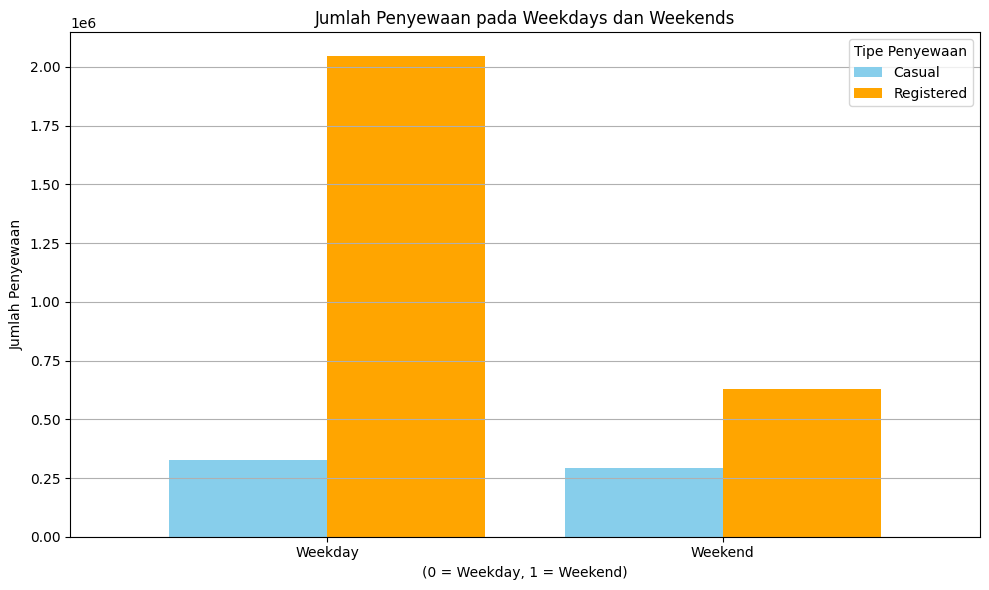

In [ ]:
# Create a new column for 'weekend' (1 if weekend, 0 if weekday)
hour_data['weekend'] = hour_data['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Group by weekend (1 = Weekend, 0 = Weekday) and calculate total rentals
weekend_rentals = hour_data.groupby('weekend')[['casual', 'registered']].sum().reset_index()

# Plot grouped bar plot
plt.figure(figsize=(10, 6))
weekend_rentals.plot(
    x='weekend',
    kind='bar',
    stacked=False,
    color=['skyblue', 'orange'],
    width=0.8,
    figsize=(10, 6)
)
plt.title('Jumlah Penyewaan pada Weekdays dan Weekends')
plt.xlabel('(0 = Weekday, 1 = Weekend)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.legend(['Casual', 'Registered'], title='Tipe Penyewaan', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Insight:**
- Visualisasi pada pertanyaan pertama akan membuat grafik garis yang memberikan informasi terkait total penyewaan sepeda tiap harinya, berdasarkan pada jam penyewaannya. Melalui grafik garis ini, kita bisa melihat pada pukul berapakah tempat penyewaan sepeda ini mulai ramai.
- Visualisasi pada pertanyaan kedua akan menghasilkan informasi dengan menggunakan *stacked bar plot*. Grafik ini cocok untuk memberikan perbandingan mengenai jumlah penyewaan sepeda berdasarkan tipe pemesanan nya (casual & registered) setiap harinya.
- Visualisasi pada pertanyaan ketiga akan memberikan informasi jumlah penyewaan pada *weekdays* dan *weekend*. Visualisasi yang dipilih menggunakan *grouped bar plot* karena memberikan cara yang jelas dan rapi untuk melihat perbandingan jumlah penyewa antara weekdays dan weekends untuk tipe penyewa casual dan registered.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion Pertanyaan 1
Berdasarkan grafik "Jumlah Penyewaan Sepeda per Jam Tiap Harinya" antara tahun 2011 dan 2012, ada beberapa kesimpulan yang dapat diambil:
1. Lonjakan Aktivitas di Pagi dan Sore Hari: Pada kedua tahun, terlihat pola
yang serupa di mana puncak penyewaan sepeda terjadi di pagi hari sekitar pukul 7-8 dan sore hari sekitar pukul 17-18. Hal ini kemungkinan mencerminkan jam-jam sibuk saat orang bepergian ke dan dari tempat kerja.

2. Peningkatan Penyewaan pada 2012: Pada tahun 2012, jumlah penyewaan sepeda secara keseluruhan meningkat signifikan dibandingkan 2011, terutama pada jam sibuk. Di puncak tertinggi, penyewaan pada 2012 bisa mencapai lebih dari 150.000 unit, sedangkan pada 2011, hanya sekitar 100.000 unit. Ini menunjukkan bahwa pada tahun 2012, layanan penyewaan sepeda menjadi lebih populer.

3. Perbedaan Pola Penyewaan pada Jam Non-Puncak: Meskipun tren umum mirip, ada perbedaan pada jam-jam non-puncak. Pada 2012, penyewaan sepeda lebih tinggi sepanjang hari, sedangkan pada 2011, lebih rendah secara konsisten di luar jam sibuk.

 Secara keseluruhan, grafik ini menunjukkan peningkatan penggunaan layanan penyewaan sepeda dari 2011 ke 2012, dengan konsistensi penggunaan yang lebih tinggi di tahun 2012, terutama selama jam-jam sibuk di pagi dan sore hari.


- Conclution pertanyaan 2
Berdasarkan grafik "Jumlah Penyewaan Casual dan Registered tiap Harinya," berikut adalah beberapa kesimpulan yang dapat diambil:

1. Mayoritas Pengguna Terdaftar (Registered): Terlihat bahwa sebagian besar penyewaan dilakukan oleh pengguna terdaftar (registered). Grafik menunjukkan bahwa pada hampir setiap jam, jumlah penyewaan oleh pengguna registered lebih besar dibandingkan pengguna casual. Ini menunjukkan bahwa layanan ini lebih populer di kalangan pengguna yang sering memanfaatkan penyewaan sepeda.

2. Pola Aktivitas Harian yang Mirip untuk Kedua Tipe Pengguna: Baik pengguna casual maupun registered mengikuti pola yang serupa, di mana puncak penyewaan terjadi sekitar pukul 8 pagi dan 5-6 sore. Ini menunjukkan bahwa kedua jenis pengguna memanfaatkan sepeda terutama pada waktu-waktu sibuk, seperti jam berangkat kerja dan pulang kerja.

- Conclution pertanyaan 3 Berdasarkan grafik "Jumlah Penyewaan pada Weekdays dan Weekends," berikut adalah beberapa kesimpulan yang dapat diambil:

1. Mayoritas Pengguna Terdaftar (Registered): Terlihat bahwa sebagian besar penyewaan dilakukan oleh pengguna terdaftar (registered). Pada weekdays, jumlah penyewaan oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna casual. Ini menunjukkan bahwa layanan penyewaan sepeda lebih sering digunakan oleh pengguna yang terdaftar secara reguler, terutama pada hari kerja.

2. Pola Aktivitas yang Berbeda Berdasarkan Hari: Pada weekdays, pengguna registered mendominasi dengan jumlah penyewaan yang jauh lebih besar dibandingkan dengan akhir pekan (weekend). Sebaliknya, pada akhir pekan, meskipun penyewaan oleh pengguna registered masih lebih tinggi daripada casual, selisihnya tidak sebesar di hari kerja. Hal ini mungkin menunjukkan penggunaan sepeda yang lebih beragam atau fleksibel pada akhir pekan.

